In [1]:
import sys
sys.path.append('/data/users/s/e/seturnbu/repos/forecast-workflow/')


In [2]:

import data.sentinel3_ob as sent3_ob
from datetime import datetime


In [3]:
# specficiation of area of interest bounding box
# used during cropping function to create bounding box containing the AOI
aoicoords =[ [
              -73.70722942154853,
              45.29109151824292
            ],
            [
              -73.74672096394154,
              43.59640960559392
            ],
            [
              -73.11676292910073,
              43.631179191205035
            ],
            [
              -72.99367855228084,
              45.30779935640291
            ],
            [
              -73.70722942154853,
              45.29109151824292
            ]
]

In [4]:
min_long, min_lat = min(aoicoords, key=lambda c: (c[0], c[1]))
max_long, max_lat = max(aoicoords, key=lambda c: (c[0], c[1]))

In [5]:
cropbox = [min_long, max_lat, max_long, min_lat]
cropbox

[-73.74672096394154, 45.30779935640291, -72.99367855228084, 43.59640960559392]

In [6]:
d_down = sent3_ob.get_data(start_date="20240801",
            end_date="20240901",
            output_dir="/netfiles/ciroh/seturnbu/sentout",
            cropbox=cropbox,
            remove_temp=True,
            areaid="8_2",
            appkey="0f62685fdefefa119c2d49b0c01da59dbeb6cd4a"
            )

sentinel3_ob.get_data years to process:
[2024]
sentinel3_ob.get_data() locations
{'8_2'}
prepping to run  /data/users/s/e/seturnbu/repos/forecast-workflow/data/ci_data_download/ci-download.py


/data/condaShared/envs/standard/lib/python3.12/site-packages/osgeo/osr.py:410: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Generating CI Files
Load Downloaded TIF Files into Dataset
['/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024214.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024215.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024216.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024217.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024218.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024219.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024220.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024221.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Files/L2024222.L3m_DAY_CYAN_CI_cyano_CYAN_CONUS_300m_8_2.tif', '/netfiles/ciroh/seturnbu/sentout/DN_Fil

In [7]:
d_down

<xarray.Dataset> Size: 5MB
Dimensions:      (time: 32, y: 575, x: 253)
Coordinates:
  * x            (x) float64 2kB -73.75 -73.74 -73.74 ... -73.0 -73.0 -73.0
  * y            (y) float64 5kB 45.31 45.3 45.3 45.3 ... 43.61 43.61 43.6 43.6
  * time         (time) datetime64[ns] 256B 2024-08-01 2024-08-02 ... 2024-09-01
    spatial_ref  int64 8B 0
Data variables:
    DN           (time, y, x) uint8 5MB 254 254 254 254 254 ... 254 254 254 254
Attributes:
    OBPG_version:   6.0
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

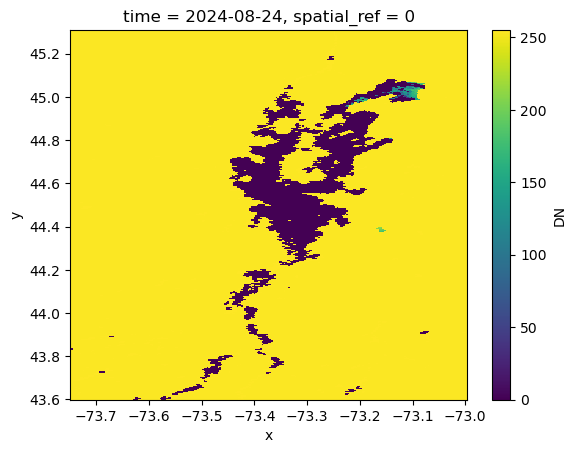

In [8]:
d_down.sel(time=datetime.strptime('2024-08-24', '%Y-%m-%d'))["DN"].plot()

In [9]:
array= d_down.sel(time=datetime.strptime('2024-08-03', '%Y-%m-%d'))["DN"]

In [10]:
array

<xarray.DataArray 'DN' (y: 575, x: 253)> Size: 145kB
array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], shape=(575, 253), dtype=uint8)
Coordinates:
  * x            (x) float64 2kB -73.75 -73.74 -73.74 ... -73.0 -73.0 -73.0
  * y            (y) float64 5kB 45.31 45.3 45.3 45.3 ... 43.61 43.61 43.6 43.6
    time         datetime64[ns] 8B 2024-08-03
    spatial_ref  int64 8B 0

<Axes: title={'center': 'time = 2024-08-03, spatial_ref = 0'}, xlabel='x', ylabel='y'>

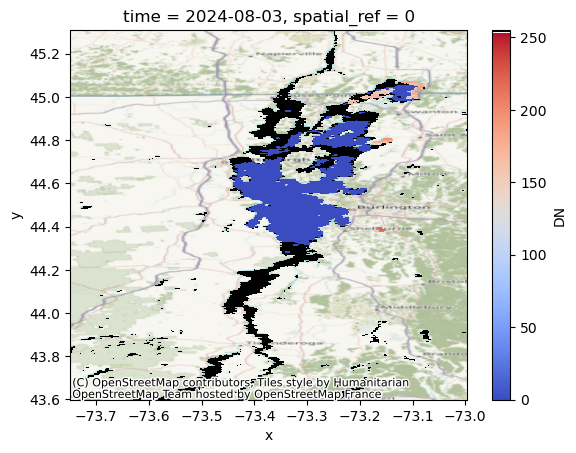

In [11]:
sent3_ob.plot(array)

Function development source snips, below

In [98]:
import contextily as cx
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import numpy as np

In [89]:
customcmap = plt.colormaps['coolwarm']


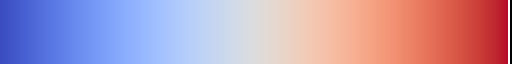

In [116]:
new_colors = plt.colormaps['coolwarm'](np.linspace(0, 1, plt.colormaps['coolwarm'].N)) 
DN_cmap = mc.ListedColormap(new_colors) # nwe listed color 
DN_cmap.colors[254] = (1,1,1,1) # ground value grey
DN_cmap.colors[255] = (0,0,0,1) # no-data/cloud value black
DN_cmap

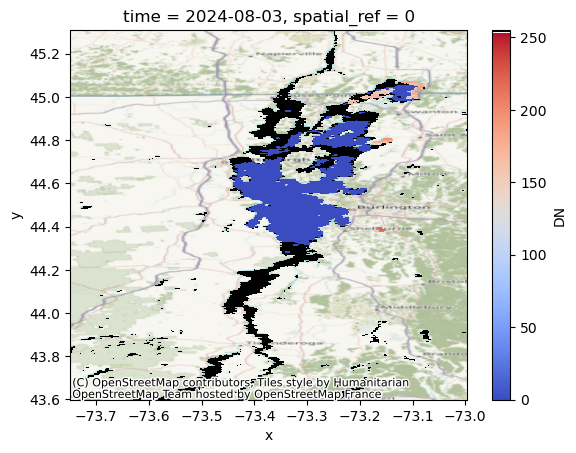

In [117]:
fig2, axs2 = plt.subplots()
array2.where(array2.values!=254).plot(ax=axs2,cmap=DN_cmap)
#array2.where(array2.values==255).plot(ax=axs2,cmap='binary', add_colorbar=True)
cx.add_basemap(axs2, crs=array2.rio.crs)


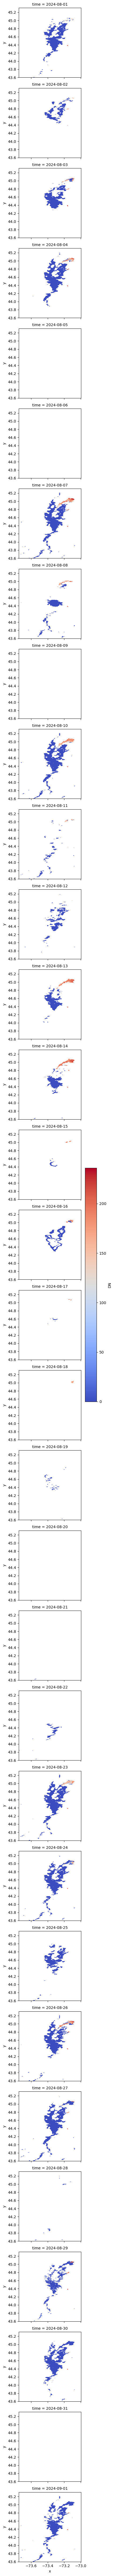

In [26]:
d_down["DN"].where(d_down["DN"].values<254).plot(cmap='coolwarm',row='time')